<a href="https://colab.research.google.com/github/oyyarko/deeplearning_cnn/blob/master/Malaria_Parasite_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 15.0MB/s 
     |████████████████████████████████| 4.3MB 31.2MB/s 


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.0.0-rc0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 21.15 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [9]:
train_data_generator = datagen.flow_from_directory(
    directory='Malaria-Classification-Using-CNN/malaria-dataset',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'training'
)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Found 22048 images belonging to 2 classes.


In [10]:
validation_data_generator = datagen.flow_from_directory(
    directory='Malaria-Classification-Using-CNN/malaria-dataset',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = 16,
    subset = 'validation'
)

Found 5510 images belonging to 2 classes.


In [11]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [15]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch=len(train_data_generator),
                              epochs=5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 227s 165ms/step - loss: 0.4800 - accuracy: 0.7145 - val_loss: 0.1732 - val_accuracy: 0.9416
Epoch 2/5
1378/1378 [==============================] - 230s 167ms/step - loss: 0.1733 - accuracy: 0.9493 - val_loss: 0.1832 - val_accuracy: 0.9439
Epoch 3/5
1378/1378 [==============================] - 225s 164ms/step - loss: 0.1605 - accuracy: 0.9534 - val_loss: 0.1810 - val_accuracy: 0.9397
Epoch 4/5
1378/1378 [==============================] - 223s 162ms/step - loss: 0.1536 - accuracy: 0.9539 - val_loss: 0.1667 - val_accuracy: 0.9450
Epoch 5/5
1378/1378 [==============================] - 239s 174ms/step - loss: 0.1533 - accuracy: 0.9545 - val_loss: 0.1789 - val_accuracy: 0.9454


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

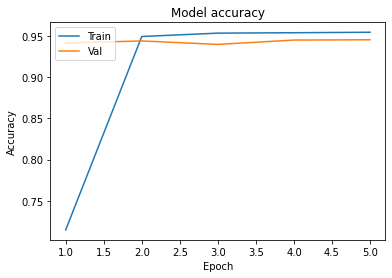

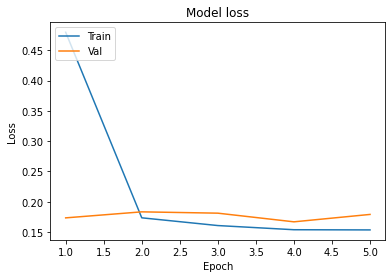

In [17]:
plot_learningCurve(history, 5)